
# Stock Price Prediction Using Random Forest

This notebook demonstrates how to predict stock closing prices using a Random Forest regression model. 

The approach includes:

- Handling missing data
- Engineering financial indicators such as moving averages and RSI
- Training and testing a regression model
- Evaluating model performance



## Features Used

- **7DMA**: 7-day moving average of the closing price
- **30DMA**: 30-day moving average of the closing price
- **RSI**: Relative Strength Index (14-day)

## Functions

- `dt(loc)`: Loads the CSV dataset from the given path.
- `fillin(loc)`: Fills missing `Close` values with forward fill.
- `markers(loc)`: Adds 7DMA, 30DMA, Return, and RSI to the dataset.
- `ins(loc)`: Prepares feature columns for model input.
- `outs(loc)`: Prepares target column for model output.
- `randomf(loc)`: Trains the model, evaluates it, and prints performance metrics.


In [14]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt


In [15]:

def dt(loc):
    # CSV file is loaded with parsing of dates enabled
    stock = pd.read_csv(loc, parse_dates=True)
    return stock

def fillin(loc):
    # Data is loaded and missing closing prices are forward-filled
    stock = dt(loc)
    stock['Close'] = stock['Close'].ffill()
    return stock

def markers(loc):
    # Moving averages, percentage return, and RSI are computed and added
    stock = fillin(loc)
    stock['7DMA'] = stock['Close'].shift(1).rolling(window=7, min_periods=0).mean()
    stock['30DMA'] = stock['Close'].shift(1).rolling(window=30, min_periods=0).mean()
    stock['Return'] = stock['Close'].shift(1).pct_change() * 100

    change = stock['Close'].diff()
    avgain = change.where(change > 0, 0).shift(1).rolling(window=14, min_periods=1).sum() / 14
    avloss = abs(change.where(change < 0, 0).shift(1).rolling(window=14, min_periods=1).sum()) / 14
    stock['RSI'] = (avgain / (avgain + avloss)) * 100

    return stock


In [16]:

def ins(loc):
    # Features are extracted from computed indicators
    stock = markers(loc)
    inputs = pd.DataFrame()
    inputs['7DMA'] = stock['7DMA']
    inputs['30DMA'] = stock['30DMA']
    inputs['RSI'] = stock['RSI']
    return inputs

def outs(loc):
    # Closing price is extracted as the target
    stock = markers(loc)
    outputs = pd.DataFrame()
    outputs['Close'] = stock['Close']
    return outputs


In [17]:

def randomf(loc):
    # Data is split, model is trained, and metrics are reported
    inputs = ins(loc)
    outputs = outs(loc)

    intrain, intest, outtrain, outtest = train_test_split(inputs, outputs, test_size=0.2, shuffle=False)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(intrain, outtrain.values.ravel())  # Flatten output to 1D

    predout = rf.predict(intest)

    print("Mean Absolute Error:", mean_absolute_error(outtest, predout))
    print("R^2 Score:", r2_score(outtest, predout))



Mean Absolute Error: 281.1305215324929
R^2 Score: -1.3661743871262022


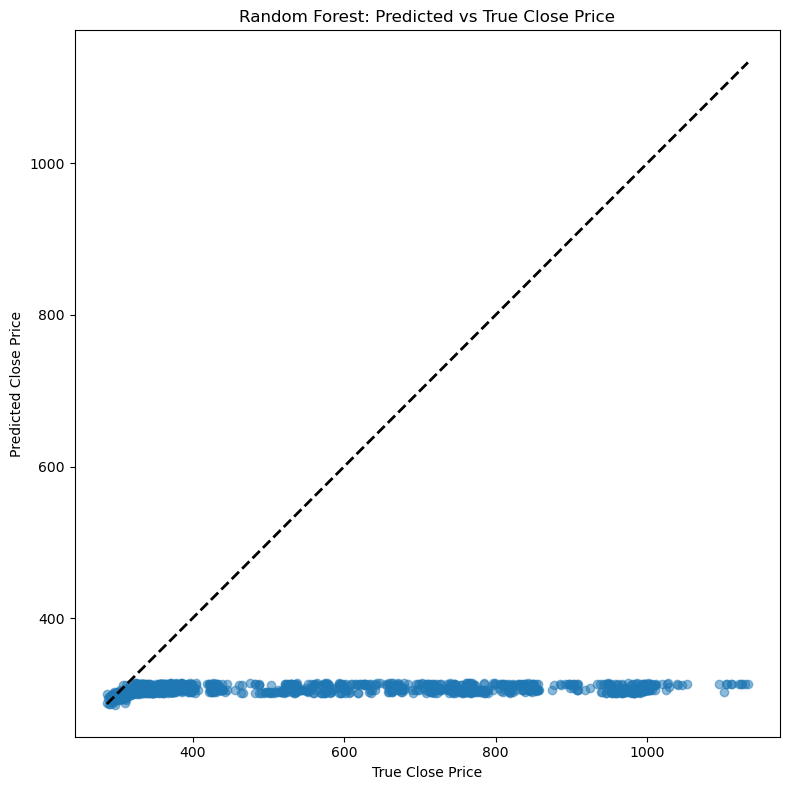

None


In [18]:

# Replace this path with your own
print(randomf(Path.home() / 'Downloads' / 'Amazon' / 'amzn.us.csv'))
